<a href="https://colab.research.google.com/github/shiv4ngi/Task/blob/master/xyzcorp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XYZCorp_LendingData

## Business Problem

**Description**

In this project you will have to put yourself in the shoes of a loan issuer and manage credit risk by using the past data and deciding whom to give the loan to in the future. The text files contain complete loan data for all loans issued by XYZ Corp. through 2007-2015. The data contains the indicator of default, payment information, credit history, etc.

**Business  Constraints and Objectives **

1.   Barrier to further lending.

1.   Negative economic growth
2.  No low latency requirements.





In [103]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
sns.set_style('whitegrid')



**Reading the data**

In [0]:
data = pd.read_csv('drive/My Drive/XYZCorp_LendingData.txt',sep='\t',parse_dates=['issue_d'],low_memory=False)

In [0]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
id                             855969 non-null int64
member_id                      855969 non-null int64
loan_amnt                      855969 non-null float64
funded_amnt                    855969 non-null float64
funded_amnt_inv                855969 non-null float64
term                           855969 non-null object
int_rate                       855969 non-null float64
installment                    855969 non-null float64
grade                          855969 non-null object
sub_grade                      855969 non-null object
emp_title                      806526 non-null object
emp_length                     812908 non-null object
home_ownership                 855969 non-null object
annual_inc                     855969 non-null float64
verification_status            855969 non-null object
issue_d                        855969 non-null datetime64[ns]
pymnt_plan   

We have data of those people to whom loan has been given. 'default_ind' is the column which tells that whether the person has pay back the loan or not. '0' represnts paid back while '1' represents did't paid.

In [0]:
data.shape

(855969, 73)

In [0]:
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.000000,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,2011-12-01,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.70,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.0000,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.000000,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,2011-12-01,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.40,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.1100,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.000000,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,2011-12-01,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.50,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.0000,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.000000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,2011-12-01,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.00,37.0,f,0.00,0.00,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.0000,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.000000,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,2011-12-01,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.90,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.0000,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,1075269,1311441,5000.0,5000.0,5000.000000,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.00,Source Verified,2011-12-01,n,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,Nov-2004,3.0,NaN,NaN,9.0,0.0,7963.0,28.30,12.0,f,0.00,0.00,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.0000,Jan-2015,161.03,NaN,Sep-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,1069639,1304742,7000.0,7000.0,7000.000000,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.00,Not Verified,2011-12-01,n,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,280xx,NC,23.51,0.0,Jul-2005,1.0,NaN,NaN,7.0,0.0,17726.0,

In [0]:
data.isnull().sum(axis = 0)

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       49443
emp_length                      43061
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
pymnt_plan                          0
desc                           734157
purpose                             0
title                              33
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_l

**Observation:-** Many  variables we see here contains NaN values that means later we can remove those columns.

# Exploratory data analysis

In [0]:
data['default_ind'].value_counts()

#'0' is successfully paid

0    809502
1     46467
Name: default_ind, dtype: int64

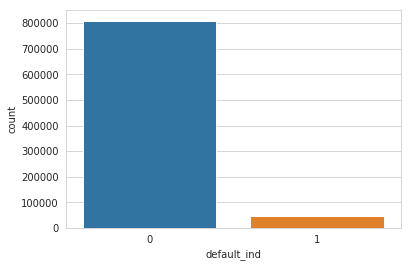

In [0]:
sns.countplot('default_ind',data=data)

**Observation-** This shows that it is an imbalanced data.
Out of 855969 people around 800000 are those who paid back the loan and rest are defaulters.
.

**addr_state**

In [0]:
data['addr_state'].value_counts()

CA    125172
NY     71114
TX     68708
FL     58639
IL     34379
NJ     32061
PA     30250
OH     28651
GA     28043
VA     25234
NC     23787
MI     22175
MD     20209
MA     19835
AZ     19693
WA     18816
CO     18211
MN     15424
MO     13743
IN     13348
CT     13042
TN     12392
NV     11972
WI     11199
AL     10732
OR     10562
SC     10302
LA     10186
KY      8299
OK      7759
KS      7693
AR      6399
UT      6055
NM      4757
HI      4380
WV      4247
NH      4156
RI      3753
MS      3653
MT      2466
DE      2402
DC      2382
AK      2134
WY      1974
VT      1753
SD      1745
NE      1124
ME       491
ND       452
ID         9
IA         7
Name: addr_state, dtype: int64

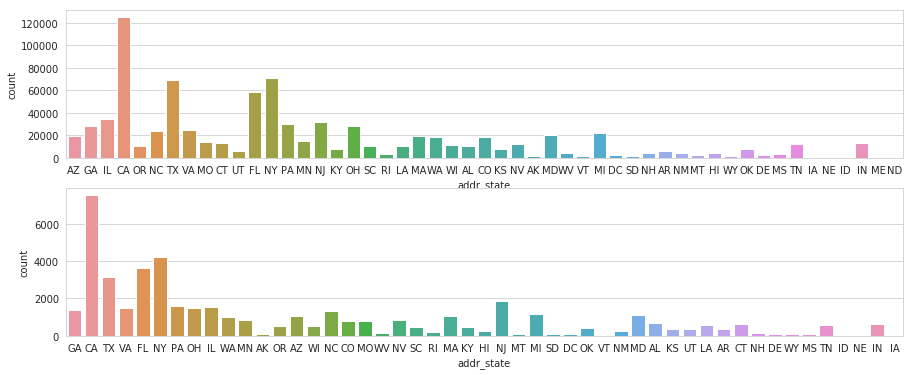

In [0]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,6))
plt.subplot(2,1,1)
sns.countplot(x= 'addr_state', data= data)
plt.subplot(2,1,2)
sns.countplot(x = 'addr_state', data = data[(data['default_ind'] == 1)])

In this we compared how the distribution looks like of the states where loan has given and the second one shows information about those who didn't paid back the loan. 

**annual_inc - The self-reported annual income provided by the borrower during registration.**

In [0]:
data['annual_inc'].describe()

count    8.559690e+05
mean     7.507119e+04
std      6.426447e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.500000e+04
75%      9.000000e+04
max      9.500000e+06
Name: annual_inc, dtype: float64

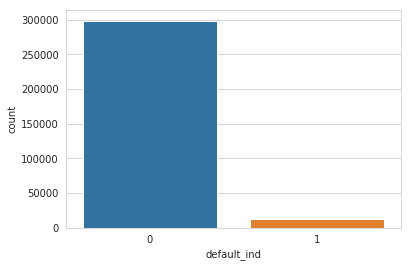

In [0]:
sns.countplot(x= 'default_ind',data = data[data['annual_inc']>=75071])

**Observation-** Here we see that majority of people whose income is equal and above 75071 has paid back the loan and rest are defaulters. 

**annual_inc_joint - Indicates whether the loan is an individual application or a joint application with two co-borrowers**

In [0]:
data['annual_inc_joint'].isnull().sum()

855527

**Observation-** Drop it later 

**application_type - Indicates whether the loan is an individual application or a joint application with two co-borrowers**

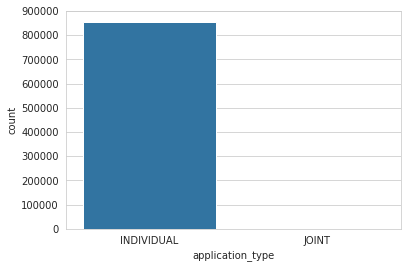

In [0]:
sns.countplot(x= 'application_type', data= data)

**Observation-** All the applications are of individual type and none of them are joint.



desc and delinq_2 yrs are not providing any useful information, leave it for now


**DTI- Debt To Income=total debt/total income**


**dti - ** A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested loan, divided by the borrower’s self-reported monthly income.

Since we know dti <100. Therefore we'll find outliers if any.

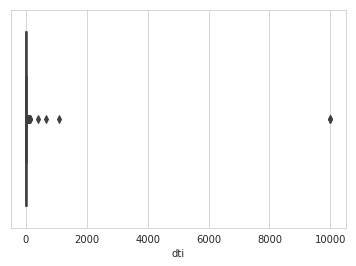

In [0]:
sns.boxplot(data['dti'])

**Observation-** Since there are some outliers which we'll replace by some central tendency.

In [0]:
data['dti'].mean()

18.122164821389337

dti_joint and member_id are not providing any relevant info, leave them for now

Text(0.5, 1.0, 'Amount Funded')

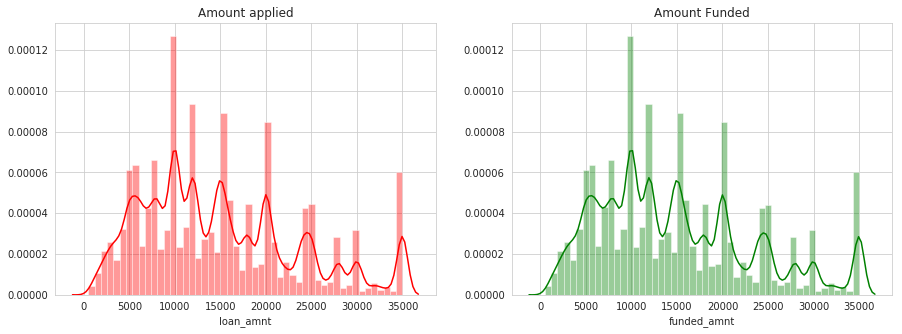

In [0]:
#loan amount and funded amount are same, i.e what was applied for they got.
fig,ax = plt.subplots(1,2, figsize =(15,5))
sns.distplot( data['loan_amnt'], ax = ax[0],color ='red')
sns.distplot( data['funded_amnt'], ax = ax[1], color =  'green')
ax[0].set_title("Amount applied")
ax[1].set_title("Amount Funded")

**Observation-** We see that loan applied and loan funded are almost same.

In [0]:
data.loc[:,['loan_amnt','funded_amnt','funded_amnt_inv']].head(10)

,loan_amnt,funded_amnt,funded_amnt_inv
0,5000.0,5000.0,4975.0
1,2500.0,2500.0,2500.0
2,2400.0,2400.0,2400.0
3,10000.0,10000.0,10000.0
4,3000.0,3000.0,3000.0
5,5000.0,5000.0,5000.0
6,7000.0,7000.0,7000.0
7,3000.0,3000.0,3000.0
8,5600.0,5600.0,5600.0
9,5375.0,5375.0,5350.0


**Observation**- since three of them are same we will drop two of them later.

**Employement length- frequency of people who applied for loan based on their emp length**

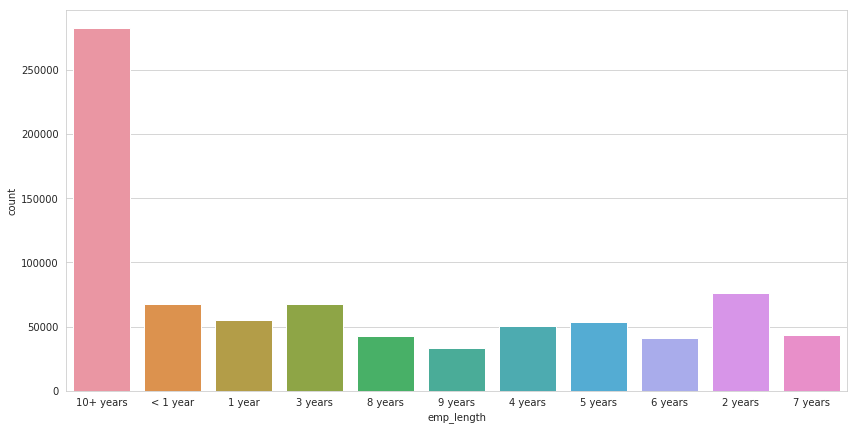

In [0]:
plt.figure(figsize=(14,7))
sns.countplot(x= 'emp_length', data= data)

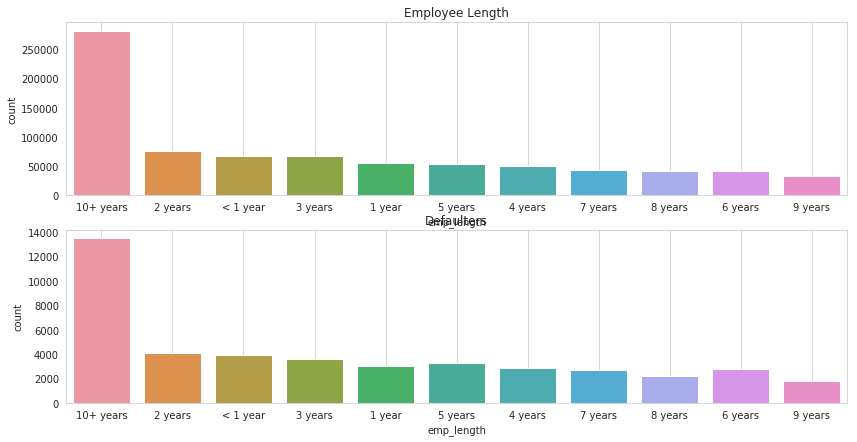

In [0]:
#Comparing no. of defaulters with employement length
plt.figure(figsize=(14,7))
plt.subplot(2,1,1)

sns.countplot(x='emp_length',data=data,order=data['emp_length'].value_counts().index)
plt.title("Employee Length")
plt.grid()

plt.subplot(2,1,2)
sns.countplot(x='emp_length',data=data[(data['default_ind']==1 )],order=data['emp_length'].value_counts().index)
plt.title("Defaulters")
plt.grid()

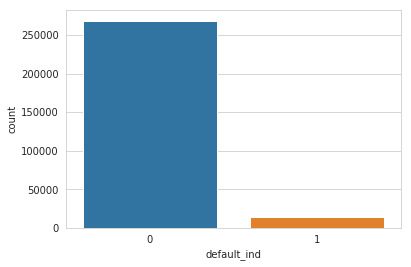

In [0]:
sns.countplot(x='default_ind',data=data[(data['emp_length']=='10+ years' )])

**Observation-** This shows that people who are employed for 10 or more years are more likely to pay back their loans.

**emp_title - The job title supplied by the Borrower when applying for the loan.**

In [0]:
data['emp_title'].value_counts()

Teacher                                  12965
Manager                                  10821
Registered Nurse                          5341
RN                                        5182
Owner                                     5157
Supervisor                                4792
Sales                                     4051
Project Manager                           3856
Driver                                    3417
Office Manager                            3404
Director                                  3067
General Manager                           3060
manager                                   2994
teacher                                   2820
owner                                     2727
Engineer                                  2574
President                                 2478
driver                                    2319
Vice President                            2283
Attorney                                  2074
Operations Manager                        1995
Accountant   

**grade - XYZ corp. assigned loan grade**

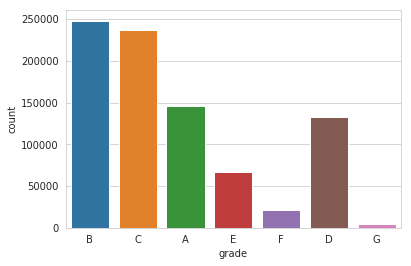

In [0]:
sns.countplot(x= 'grade', data= data)

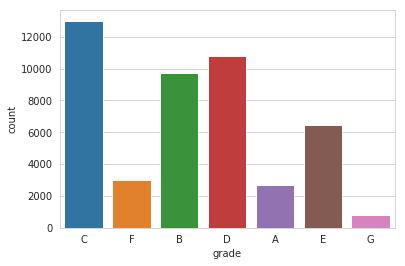

In [0]:
sns.countplot(x='grade', data= data[data['default_ind']==1])

**Observation-** This shows that  grade C has maximum defaulters

**home_ownership - The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.**

In [0]:
data['home_ownership'].value_counts()

MORTGAGE    429106
RENT        342535
OWN          84136
OTHER          144
NONE            45
ANY              3
Name: home_ownership, dtype: int64

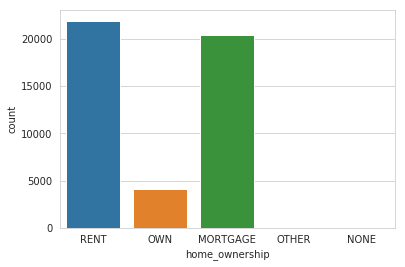

In [0]:
sns.countplot(x='home_ownership', data= data[data['default_ind']==1])

**Observation-**  

1.   Majority of people whose status is rent and mortgage are defaulters
2.   Around 4000 people are defaulters who own house.


**initial_list_status**

In [0]:
data['initial_list_status'].value_counts()

f    442555
w    413414
Name: initial_list_status, dtype: int64

**installment - The monthly payment owed by the borrower if the loan originates.**

In [0]:
print(data.loc[data.default_ind==1,'installment'].mean())
print(data.loc[data.default_ind==0,'installment'].mean())

441.07321884347874
435.9605249278156


**Observation**- mean of both defaulters and non defaulters are almost same.

**int_rate - Interest Rate on the loan**

In [0]:
data['int_rate'].describe()

count    855969.000000
mean         13.192320
std           4.368365
min           5.320000
25%           9.990000
50%          12.990000
75%          15.990000
max          28.990000
Name: int_rate, dtype: float64

**issued_d**

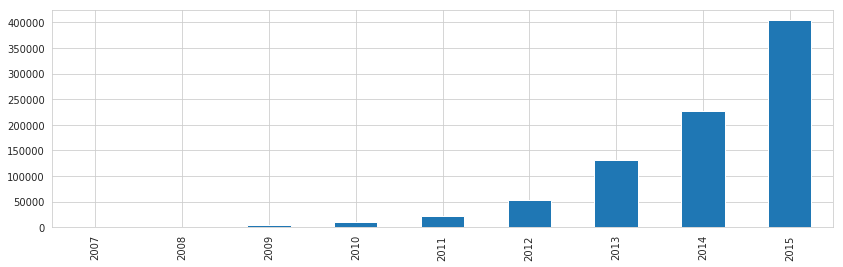

In [0]:
plt.figure(figsize =(14,4))
data['issue_d'].dt.year.value_counts().sort_index().plot.bar()

**Observation-** It shows that in 2015 maximum number of loans were given.

**loan amount details**

In [0]:
data['loan_amnt'].describe()

count    855969.000000
mean      14745.571335
std        8425.340005
min         500.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

**open acc**

In [0]:
data['open_acc'].describe()

count    855969.000000
mean         11.542447
std           5.308094
min           0.000000
25%           8.000000
50%          11.000000
75%          14.000000
max          90.000000
Name: open_acc, dtype: float64

**policy code**

In [0]:
data['policy_code'].value_counts()

1.0    855969
Name: policy_code, dtype: int64

**Observation-** all values are of same category

**public records**

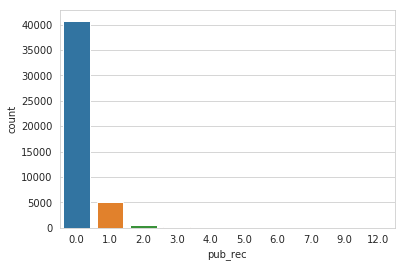

In [0]:
sns.countplot(x= 'pub_rec', data = data[(data['default_ind']==1)])

**Purpose**

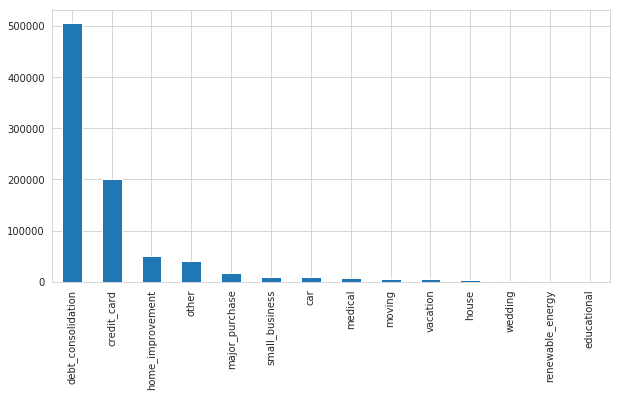

In [0]:
data.purpose.value_counts(ascending=False).plot.bar(figsize=(10,5))

**Observation-** Mostly the loan was issued for debt_consolidation

**payment plan**

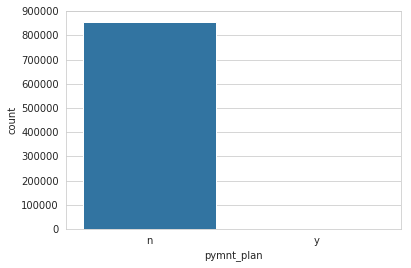

In [0]:
sns.countplot(x='pymnt_plan', data= data)

In [0]:
data['pymnt_plan'].value_counts()

n    855964
y         5
Name: pymnt_plan, dtype: int64

**Observation-** Most of the values are 'n', so not needed.Same is for 'recoveries'

**sub_grade - XYZ assigned assigned loan subgrade**

In [0]:
data['sub_grade'].value_counts()

B3    54958
B4    54116
C1    51588
C2    50457
C3    48337
B2    47589
B5    47333
C4    46941
B1    44002
A5    43957
C5    39532
D1    34667
A4    33991
D2    28385
D3    25289
D4    24253
A3    23095
A1    22516
A2    22106
D5    20208
E1    17230
E2    15994
E3    13294
E4    11011
E5     8919
F1     6702
F2     4979
F3     4099
F4     3168
F5     2380
G1     1698
G2     1259
G3      877
G4      570
G5      469
Name: sub_grade, dtype: int64

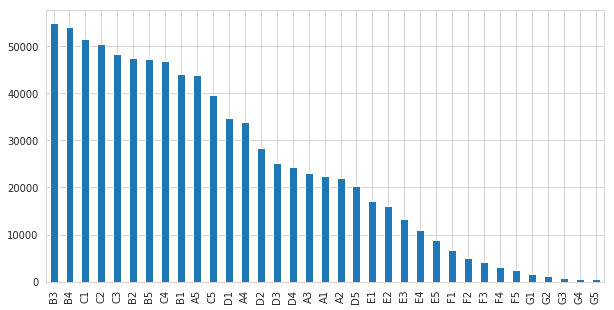

In [0]:
data.sub_grade.value_counts(ascending=False).plot.bar(figsize=(10,5),)


**term - The number of payments on the loan. Values are in months and can be either 36 or 60**

In [0]:
data['term'].value_counts()

 36 months    600221
 60 months    255748
Name: term, dtype: int64

**total_acc**

In [0]:
data['total_acc'].describe()

count    855969.000000
mean         25.269269
std          11.818841
min           2.000000
25%          17.000000
50%          24.000000
75%          32.000000
max         169.000000
Name: total_acc, dtype: float64

In [0]:
data['total_acc'].isnull().sum()

0

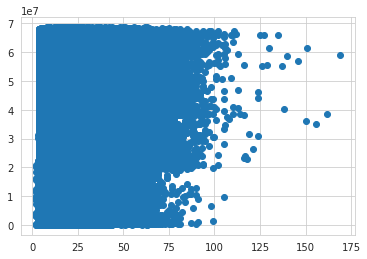

In [0]:
plt.scatter(x='total_acc', y= 'id',data= data)

**total_rec_int**

In [0]:
data['total_rec_int'].value_counts()

0.00        9362
82.76        138
174.90       123
71.33        123
283.29       119
41.37        113
130.12       112
258.02       108
194.92       108
319.41       107
451.32       106
79.47        104
475.52       102
122.73       102
510.60        98
358.33        94
390.61        94
383.29        93
158.96        92
527.97        92
49.65         91
145.89        88
218.59        88
429.99        87
308.02        87
364.36        85
497.15        85
146.88        83
153.41        83
173.19        83
            ... 
421.55         1
11888.32       1
519.82         1
1946.30        1
4174.29        1
6650.73        1
1035.53        1
1503.52        1
5386.83        1
9027.62        1
6533.52        1
6690.19        1
75.08          1
1637.57        1
5720.57        1
8616.02        1
14533.99       1
15903.72       1
3976.07        1
3740.09        1
4738.81        1
908.14         1
2979.67        1
461.74         1
5162.17        1
2271.47        1
9803.06        1
4178.21       



Again title is of no use, leave it for now

**verification_status - Was the income source verified**


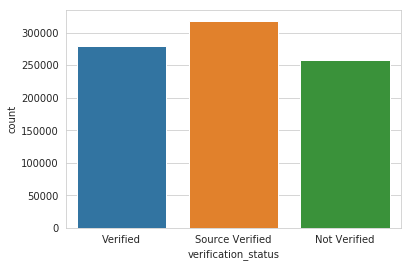

In [0]:
sns.countplot(x='verification_status', data=data)

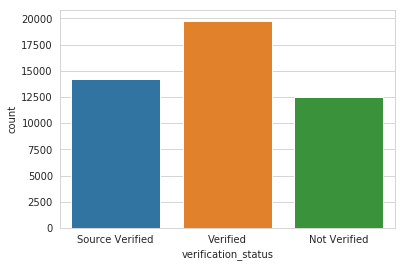

In [0]:
sns.countplot(x = 'verification_status', data = data[(data['default_ind'] == 1)])


**Observation-** Maximum defaulters are verified.

# Data cleaning and feature engineering

In [0]:
data.isnull().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       49443
emp_length                      43061
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
pymnt_plan                          0
desc                           734157
purpose                             0
title                              33
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_l

We will remove columns which have many nan values and are not useful.

In [0]:
drop_list=['emp_title','desc','title','mths_since_last_delinq','mths_since_last_record','revol_util','last_pymnt_d',
 'next_pymnt_d','last_credit_pull_d','annual_inc_joint','dti_joint','verification_status_joint','tot_coll_amt',
'tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc',
 'all_util','total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m','application_type','delinq_2yrs','collections_12_mths_ex_med','collection_recovery_fee','earliest_cr_line','loan_amnt', 'funded_amnt_inv','id','member_id','inq_last_6mths','zip_code','mths_since_rcnt_il', 'mths_since_last_major_derog','acc_now_delinq','total_pymnt', 'total_pymnt_inv', 'total_rec_prncp','policy_code','pub_rec','pymnt_plan','sub_grade','open_acc','out_prncp',
       'out_prncp_inv', 'total_rec_int', 'total_rec_late_fee','revol_bal', 'total_acc','issue_d']

data.drop(drop_list,axis=1,inplace=True)


In [0]:
data.columns

Index(['funded_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'purpose',
       'addr_state', 'dti', 'initial_list_status', 'recoveries',
       'last_pymnt_amnt', 'default_ind'],
      dtype='object')

**merging some sections to other**

In [0]:
data['home_ownership'].value_counts()


MORTGAGE    429106
RENT        342535
OWN          84136
OTHER          192
Name: home_ownership, dtype: int64

In [0]:
data['home_ownership']=data['home_ownership'].replace(['OTHER','NONE','ANY'],'OTHER')

In [0]:
data['purpose'].value_counts()

debt_consolidation    505392
credit_card           200144
home_improvement       49956
other                  40949
major_purchase         16587
small_business          9785
car                     8593
medical                 8193
moving                  5160
vacation                4542
house                   3513
wedding                 2280
renewable_energy         549
educational              326
Name: purpose, dtype: int64

In [0]:
data['purpose']=data['purpose'].replace(['major_purchase','small_business','car','medical','moving','vacation','house','wedding','renewable_energy','educational'],'others')

In [0]:
data['purpose'].value_counts()

debt_consolidation    505392
credit_card           200144
others                 59528
home_improvement       49956
other                  40949
Name: purpose, dtype: int64

In [0]:
#replace outliers with median
data['dti'].median()

17.61

In [0]:
data.loc[[454491,455963,462577,466829,498969,508976,509784,517482,521134,540528],'dti'] = 18

In [0]:
dat=data[(data.dti>=100)]
dat['dti']
data['dti'].mean()

18.09581927616514

In [0]:
data['emp_length'].fillna(value='10+ years',inplace=True)

In [0]:
data.isnull().sum()

funded_amnt            0
term                   0
int_rate               0
installment            0
grade                  0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
purpose                0
addr_state             0
dti                    0
initial_list_status    0
recoveries             0
last_pymnt_amnt        0
default_ind            0
dtype: int64

# Data Preprocessing

In [0]:
data.shape

(855969, 16)

In [0]:
x=data.iloc[:,:-1].values
y=data.iloc[:,15].values


**We will use OneHotEncoding for featurizing.**


In [0]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder=LabelEncoder()

x[:,1]=labelencoder.fit_transform(x[:,1])
x[:,4]=labelencoder.fit_transform(x[:,4])
x[:,5]=labelencoder.fit_transform(x[:,5])
x[:,6]=labelencoder.fit_transform(x[:,6])
x[:,8]=labelencoder.fit_transform(x[:,8])
x[:,9]=labelencoder.fit_transform(x[:,9])
x[:,10]=labelencoder.fit_transform(x[:,10])
x[:,12]=labelencoder.fit_transform(x[:,12])

In [0]:
onehotencoder=OneHotEncoder(categorical_features=[1,4,5,6,8,9,10])
x=onehotencoder.fit_transform(x).toarray()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [0]:
x.shape

(855969, 91)

# Model Building

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)


**Its a classification problem so applying GradientBoostingClassifier**

In [105]:
from sklearn.ensemble import GradientBoostingClassifier
classifier=GradientBoostingClassifier()
classifier.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
y_pred=classifier.predict(x_test)


In [107]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9741206488062694

# Cross validation

In [108]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99    202450
           1       1.00      0.52      0.68     11543

    accuracy                           0.97    213993
   macro avg       0.99      0.76      0.84    213993
weighted avg       0.97      0.97      0.97    213993



In [109]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[202448,      2],
       [  5536,   6007]])

# Final Observation



1.   Out of 855969  people  800000 were the ones who paid back and rest were defaulters.

1.    Majority of people whose income is equal and above 75071i.e. average of annual income has paid back the loan and rest are defaulters. 

1.   DTI less than 36% is favourable and our mean dti is 18.12 which is a good ratio

1.   People who are employed for 10 or more years are more likely to pay back their loans.
2.   Majority of people who were from grade C were defaulters so bank need to look carefully while sanctioning loan to them. 


6.  Joint applicants have susuccessfully repayed the loan, so loan for joint cases can be easily granted. 


7.  We see that more than 120000 people were from CA, and around 60000 people were from NY and TX,but people from CA consist mainly of defaulters


8.   Mostly the loan was issued for debt_consolidation

1.   Maximum defaulters are verified.
2.   Majority of people whose status is rent and mortgage are defaulters while people who own house paid back the loan.

So therefore, as per the  given observations banks need to be careful and it must follow proper set of rules and regulations while giving loans as it may reduce the profit level and also have a negative affect on economic growth in the society.

